In [1]:
import pandas  as pd
import numpy as np

In [2]:
train=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/train.csv')
test=pd.read_csv('C:/Users/19850/Desktop/数据库/NHANES数据库/写作/机器学习-临床预测模型/卒中后抑郁症风险/数据/筛选的变量用于python/test.csv')

In [3]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
# 创建KNN分类器
knn = KNeighborsClassifier()

In [6]:
# 设置要搜索的参数范围
param_grid = {
    'n_neighbors': range(1, 21),  # K值范围
    'weights': ['uniform', 'distance'],  # 权重选项
    'metric': ['euclidean', 'manhattan']  # 距离度量选项
}


In [8]:
#创建网格搜索
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

In [9]:
# 拟合模型
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [10]:
# 输出最佳参数
print("最佳参数：", grid_search.best_params_)

最佳参数： {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}


In [11]:
# 用最佳参数的模型在测试集上进行预测
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

# 预测测试集
y_pred =best_knn.predict(X_test)

# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       282
           1       0.50      0.16      0.25        55

    accuracy                           0.84       337
   macro avg       0.68      0.57      0.58       337
weighted avg       0.80      0.84      0.80       337



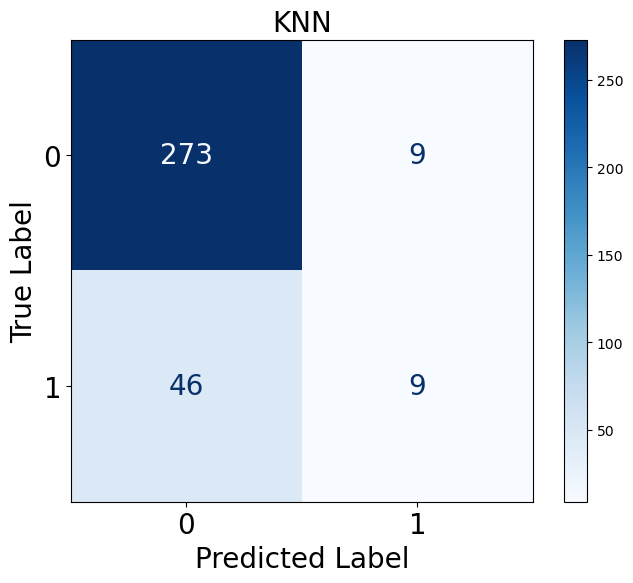

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 计算混淆矩阵
confusion_matrix_model = confusion_matrix(y_test, y_pred)
# 使用 ConfusionMatrixDisplay 绘制混淆矩阵热力图
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model)
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整图的大小
cm_display.plot(cmap='Blues', ax=ax, values_format='d')

# 修改数字字体大小
for texts in ax.texts:
    texts.set_fontsize(20)

# 设置图形标签和标题
plt.title('KNN', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
# 预测概率
y_score = best_knn.predict_proba(X_test)[:, 1]
# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()